In [1]:
import pandas as pd        # for data manipulation
import numpy as np         # for mathematical calculations
import seaborn as sns      # for data visualization

import matplotlib.pyplot as plt  #for graphical analysis
%matplotlib inline

from scipy.stats import zscore # to remove outliers

from sklearn.preprocessing import StandardScaler  # for normalize the model
from sklearn.preprocessing import LabelEncoder  # to convert object into int


from sklearn.model_selection import train_test_split  # for train and test model

import warnings                      # to ignore any warnings
warnings.filterwarnings("ignore")

from sklearn import metrics  # for model evaluation
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score, confusion_matrix, classification_report

In [45]:
data=pd.read_csv('census_income.csv')  # read the data
data   

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [46]:
# check the no. of rows & column & finding the count of missing value
print(data.isna().sum())

#printing the summary of data type
data.info() 

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  C

In [47]:
#first drop unnessesary column then remove duplicates & recheck the size
data=data.drop(columns=['Education_num','Marital_status','Relationship','Native_country'],axis=1)

data.drop_duplicates(inplace=True)

print(data.shape)

(32517, 11)


In [48]:
#understand data at high level check the stastics of dataset
data.describe(include='all')

,Age,Workclass,Fnlwgt,Education,Occupation,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Income
count,32517.000000,32517,3.251700e+04,32517,32517,32517,32517,32517.000000,32517.000000,32517.000000,32517
unique,NaN,9,NaN,16,15,5,2,NaN,NaN,NaN,2
top,NaN,Private,NaN,HS-grad,Prof-specialty,White,Male,NaN,NaN,NaN,<=50K
freq,NaN,22654,NaN,10481,4135,27776,21764,NaN,NaN,NaN,24678
mean,38.590860,NaN,1.898054e+05,NaN,NaN,NaN,NaN,1079.040194,87.421964,40.442292,NaN
std,13.639202,NaN,1.055761e+05,NaN,NaN,NaN,NaN,7390.180673,403.219959,12.348846,NaN
min,17.000000,NaN,1.228500e+04,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN
25%,28.000000,NaN,1.178270e+05,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN
50%,37.000000,NaN,1.783830e+05,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN
75%,48.000000,NaN,2.370650e+05,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN


Observations:
    1) no null vallues present.
    2) most of columns have Zero values like Capital_gain, Capital_loss lets use mean method frist for missing values.
    3)we have categorical data type(object type)

In [49]:
# Filling Null values by mean method
data['Capital_gain']=data['Capital_gain'].replace(0,data['Capital_gain'].mean())
data['Capital_loss']=data['Capital_loss'].replace(0,data['Capital_loss'].mean())
data['Workclass']=data['Workclass'].fillna(data['Workclass'].mode())
data['Occupation']=data['Occupation'].fillna(data['Occupation'].mode())

Now lets check again 

In [50]:
#understand data at high level check the stastics of dataset
data.describe(include='all')

,Age,Workclass,Fnlwgt,Education,Occupation,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Income
count,32517.000000,32517,3.251700e+04,32517,32517,32517,32517,32517.000000,32517.000000,32517.000000,32517
unique,NaN,9,NaN,16,15,5,2,NaN,NaN,NaN,2
top,NaN,Private,NaN,HS-grad,Prof-specialty,White,Male,NaN,NaN,NaN,<=50K
freq,NaN,22654,NaN,10481,4135,27776,21764,NaN,NaN,NaN,24678
mean,38.590860,NaN,1.898054e+05,NaN,NaN,NaN,NaN,2068.118893,170.760096,40.442292,NaN
std,13.639202,NaN,1.055761e+05,NaN,NaN,NaN,NaN,7250.460339,385.168885,12.348846,NaN
min,17.000000,NaN,1.228500e+04,NaN,NaN,NaN,NaN,114.000000,87.421964,1.000000,NaN
25%,28.000000,NaN,1.178270e+05,NaN,NaN,NaN,NaN,1079.040194,87.421964,40.000000,NaN
50%,37.000000,NaN,1.783830e+05,NaN,NaN,NaN,NaN,1079.040194,87.421964,40.000000,NaN
75%,48.000000,NaN,2.370650e+05,NaN,NaN,NaN,NaN,1079.040194,87.421964,45.000000,NaN


In [51]:
# lets seaprate the catogorical data & numirical data
numerics=['int8','int16','int32','int64','float16','float32','float64']
cat_col=[] #empty list
features=data.columns.values.tolist()
for i in features:
    if data[i].dtype in numerics:
        continue
    cat_col.append(i)
cat_col

['Workclass', 'Education', 'Occupation', 'Race', 'Sex', 'Income']

In [52]:
# Lets frist covert categorical data into int by encoding method
label = LabelEncoder()
df=label.fit_transform(data['Sex']) 
pd.Series(df)
data["Sex"]=df

In [53]:
df=label.fit_transform(data['Income']) #encoding income
pd.Series(df)
data["Income"]=df

In [54]:
# Convering categorical columns by using get dummies method
df_dummies=pd.get_dummies(data[['Workclass', 'Education', 'Occupation', 'Race']],drop_first=True)
data=data.join(df_dummies) #join to orignal dataset

In [55]:
data.shape # recheck the data shape

(32517, 52)

In [56]:
data.drop(columns=['Workclass','Education','Occupation','Race'],axis=1,inplace=True) # dropping the old columns

In [57]:
data.tail(3) # recheck the data

,Age,Fnlwgt,Sex,Capital_gain,Capital_loss,Hours_per_week,Income,Workclass_ Federal-gov,Workclass_ Local-gov,Workclass_ Never-worked,...,Occupation_ Priv-house-serv,Occupation_ Prof-specialty,Occupation_ Protective-serv,Occupation_ Sales,Occupation_ Tech-support,Occupation_ Transport-moving,Race_ Asian-Pac-Islander,Race_ Black,Race_ Other,Race_ White
32557,58,151910,0,1079.040194,87.421964,40,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
32558,22,201490,1,1079.040194,87.421964,20,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
32559,52,287927,0,15024.000000,87.421964,40,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


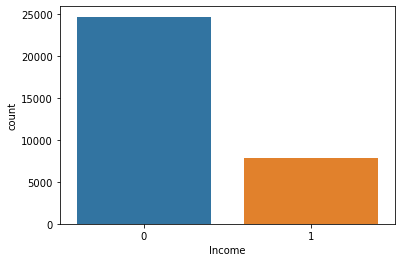

In [58]:
#plot each class frequency
sns.countplot(x='Income',data=data)
plt.show()

Almost 25000 people have <=50K income & around 9000 people have >=50K income we can see a dataimbalance in target variable

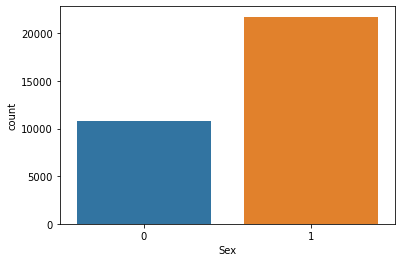

In [59]:
sns.countplot(x='Sex',data=data)
plt.show()

from above we can see there are male people are more that the female, male are above 2000 people & 1100 females are there

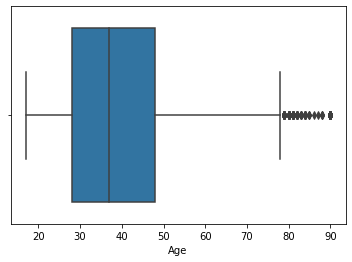

In [60]:
sns.boxplot(x='Age',data=data)
plt.show()

As we see there are people who have age more than 78 years old, maximum age is 90years old.

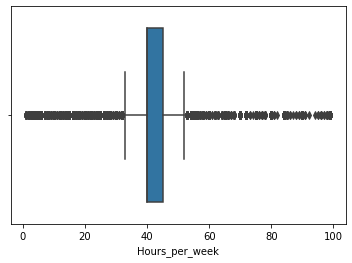

In [61]:
sns.boxplot(x='Hours_per_week',data=data)
plt.show()

there are most people are work more than 55hours per week & below 35hours per week 

<AxesSubplot:xlabel='Income', ylabel='Fnlwgt'>

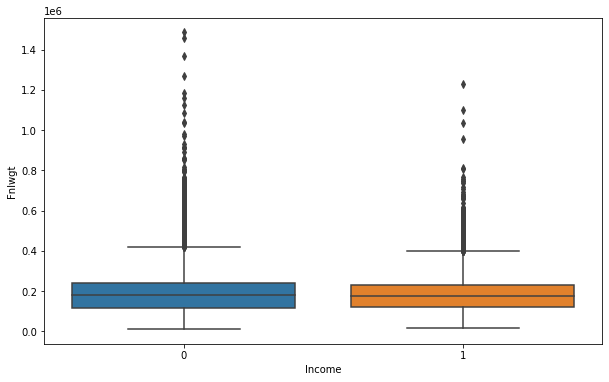

In [62]:
# Bivariant plot between income and fnlwgt
plt.figure(figsize =(10, 6))
sns.boxplot(y ='Fnlwgt', x ='Income', data = data)

<AxesSubplot:xlabel='Income', ylabel='Sex'>

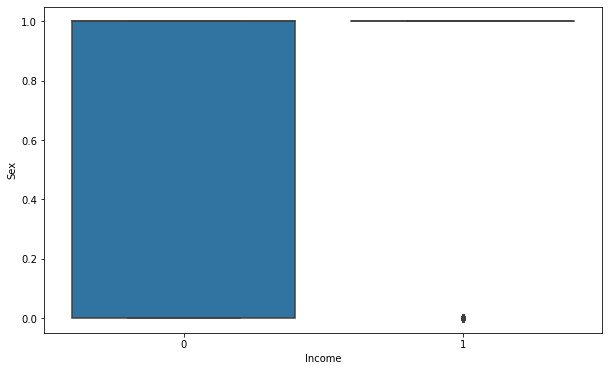

In [63]:
plt.figure(figsize =(10, 6))
sns.boxplot(y ='Sex', x ='Income', data = data)

there are more females who has income <=50K 

<AxesSubplot:xlabel='Income', ylabel='Age'>

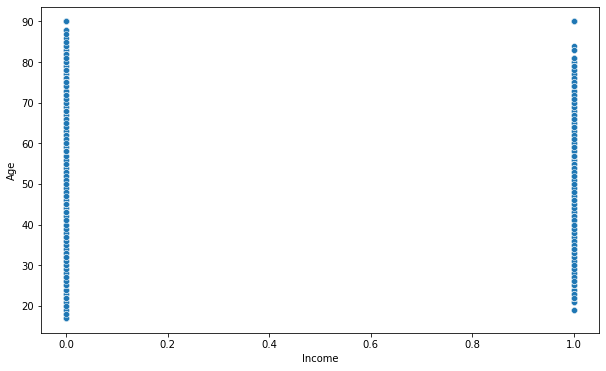

In [64]:
plt.figure(figsize =(10, 6))
sns.scatterplot(y ='Age', x ='Income', data = data)

In all age both type of income are present 

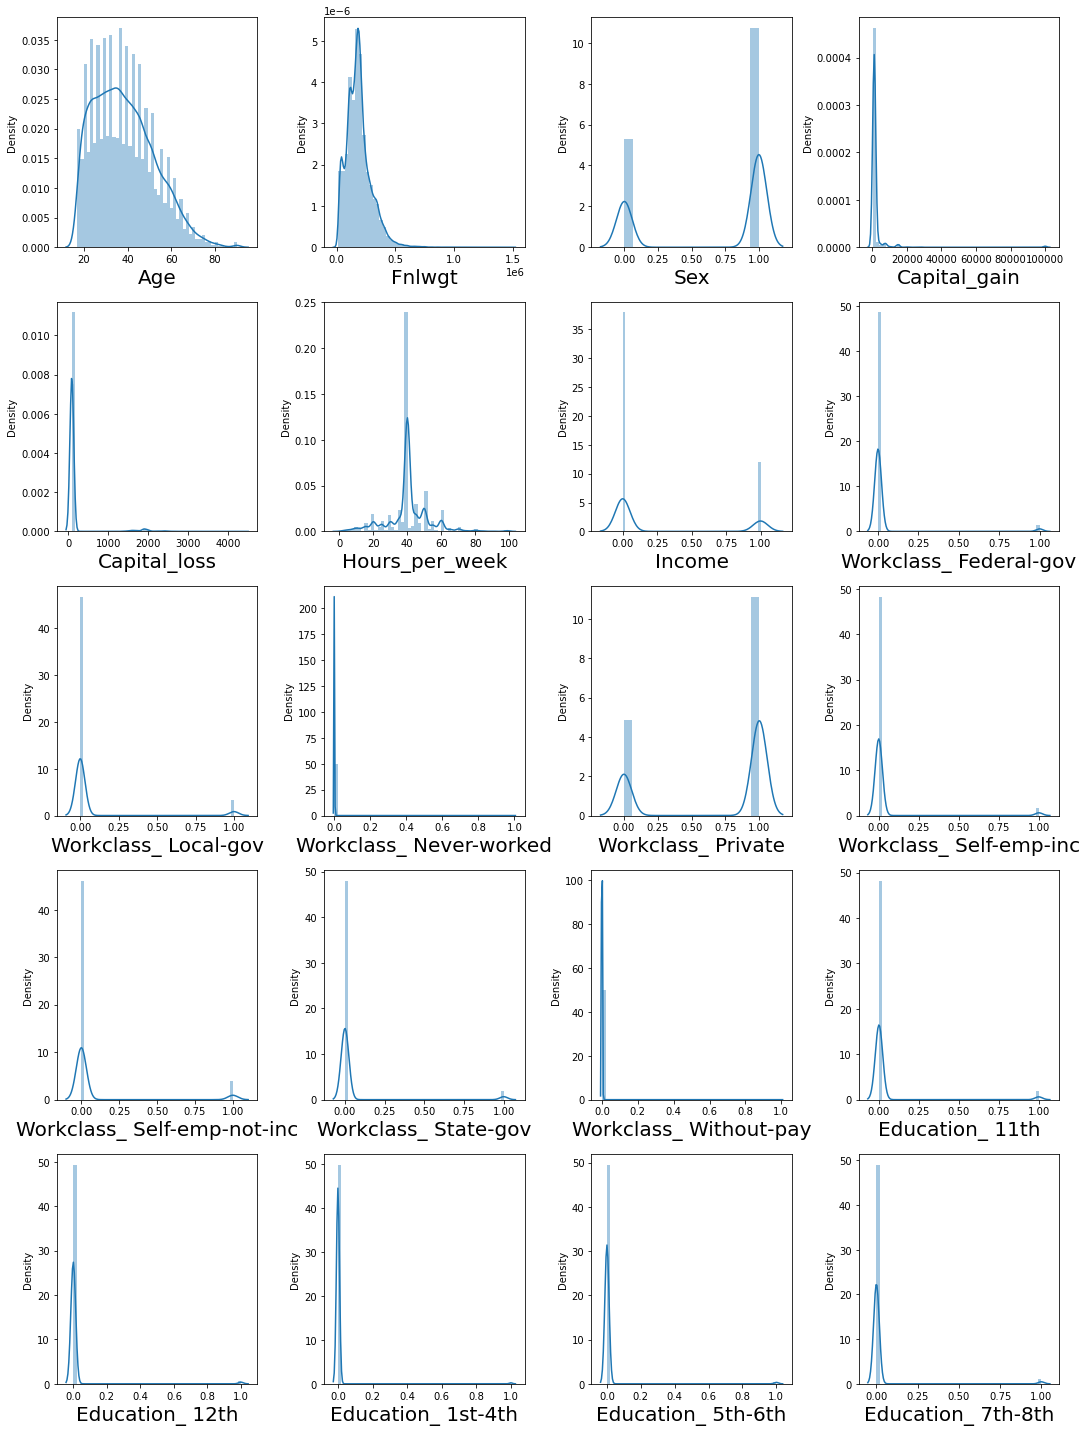

In [65]:
#Let's see the how data is distributed or Graphical analysis of all features
plt.figure(figsize=(15,20))
plotnumber=1
for column in data:
    if plotnumber<=20:
        ax=plt.subplot(5,4,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [66]:
# From above graph we can see there are almost all the columns are skewed lets check it by skew method
data.skew()

Age                               0.557108
Fnlwgt                            1.447309
Sex                              -0.719801
Capital_gain                     12.240930
Capital_loss                      4.619184
Hours_per_week                    0.228931
Income                            1.210740
Workclass_ Federal-gov            5.559240
Workclass_ Local-gov              3.550497
Workclass_ Never-worked          68.137466
Workclass_ Private               -0.855751
Workclass_ Self-emp-inc           5.116156
Workclass_ Self-emp-not-inc       3.144457
Workclass_ State-gov              4.702607
Workclass_ Without-pay           48.164897
Education_ 11th                   4.971299
Education_ 12th                   8.492182
Education_ 1st-4th               13.889149
Education_ 5th-6th                9.744837
Education_ 7th-8th                6.887566
Education_ 9th                    7.764294
Education_ Assoc-acdm             5.245153
Education_ Assoc-voc              4.535993
Education_ 

from above graph we can see their is skweness present in the data lets remove the skweness

In [67]:
from sklearn.preprocessing import PowerTransformer

fetures=['Workclass_ Never-worked', 'Fnlwgt', 'Capital_gain', 'Capital_loss','Hours_per_week','Occupation_ Armed-Forces','Education_ Preschool','Occupation_ Priv-house-serv','Education_ 1st-4th','Workclass_ Without-pay']
pt=PowerTransformer()
data[fetures]=pt.fit_transform(data[fetures].values)

In [68]:
data[fetures]

,Workclass_ Never-worked,Fnlwgt,Capital_gain,Capital_loss,Hours_per_week,Occupation_ Armed-Forces,Education_ Preschool,Occupation_ Priv-house-serv,Education_ 1st-4th,Workclass_ Without-pay
0,-0.014674,-1.089934,-0.241394,-2.775558e-17,-2.222121,-0.016639,-0.039243,-0.067389,-0.071633,-0.020754
1,-0.014674,0.398535,-0.241394,-2.775558e-17,-0.035856,-0.016639,-0.039243,-0.067389,-0.071633,-0.020754
2,-0.014674,0.562303,-0.241394,-2.775558e-17,-0.035856,-0.016639,-0.039243,-0.067389,-0.071633,-0.020754
3,-0.014674,1.339997,-0.241394,-2.775558e-17,-0.035856,-0.016639,-0.039243,-0.067389,-0.071633,-0.020754
4,-0.014674,0.956867,-0.241394,-2.775558e-17,-0.035856,-0.016639,-0.039243,-0.067389,-0.071633,-0.020754
...,...,...,...,...,...,...,...,...,...,...
32555,-0.014674,0.746477,-0.241394,-2.775558e-17,-0.197818,-0.016639,-0.039243,-0.067389,-0.071633,-0.020754
32556,-0.014674,-0.193417,-0.241394,-2.775558e-17,-0.035856,-0.016639,-0.039243,-0.067389,-0.071633,-0.020754
32557,-0.014674,-0.219871,-0.241394,-2.775558e-17,-0.035856,-0.016639,-0.039243,-0.067389,-0.071633,-0.020754
32558,-0.014674,0.271482,-0.241394,-2.775558e-17,-1.655368,-0.016639,-0.039243,-0.067389,-0.071633,-0.020754


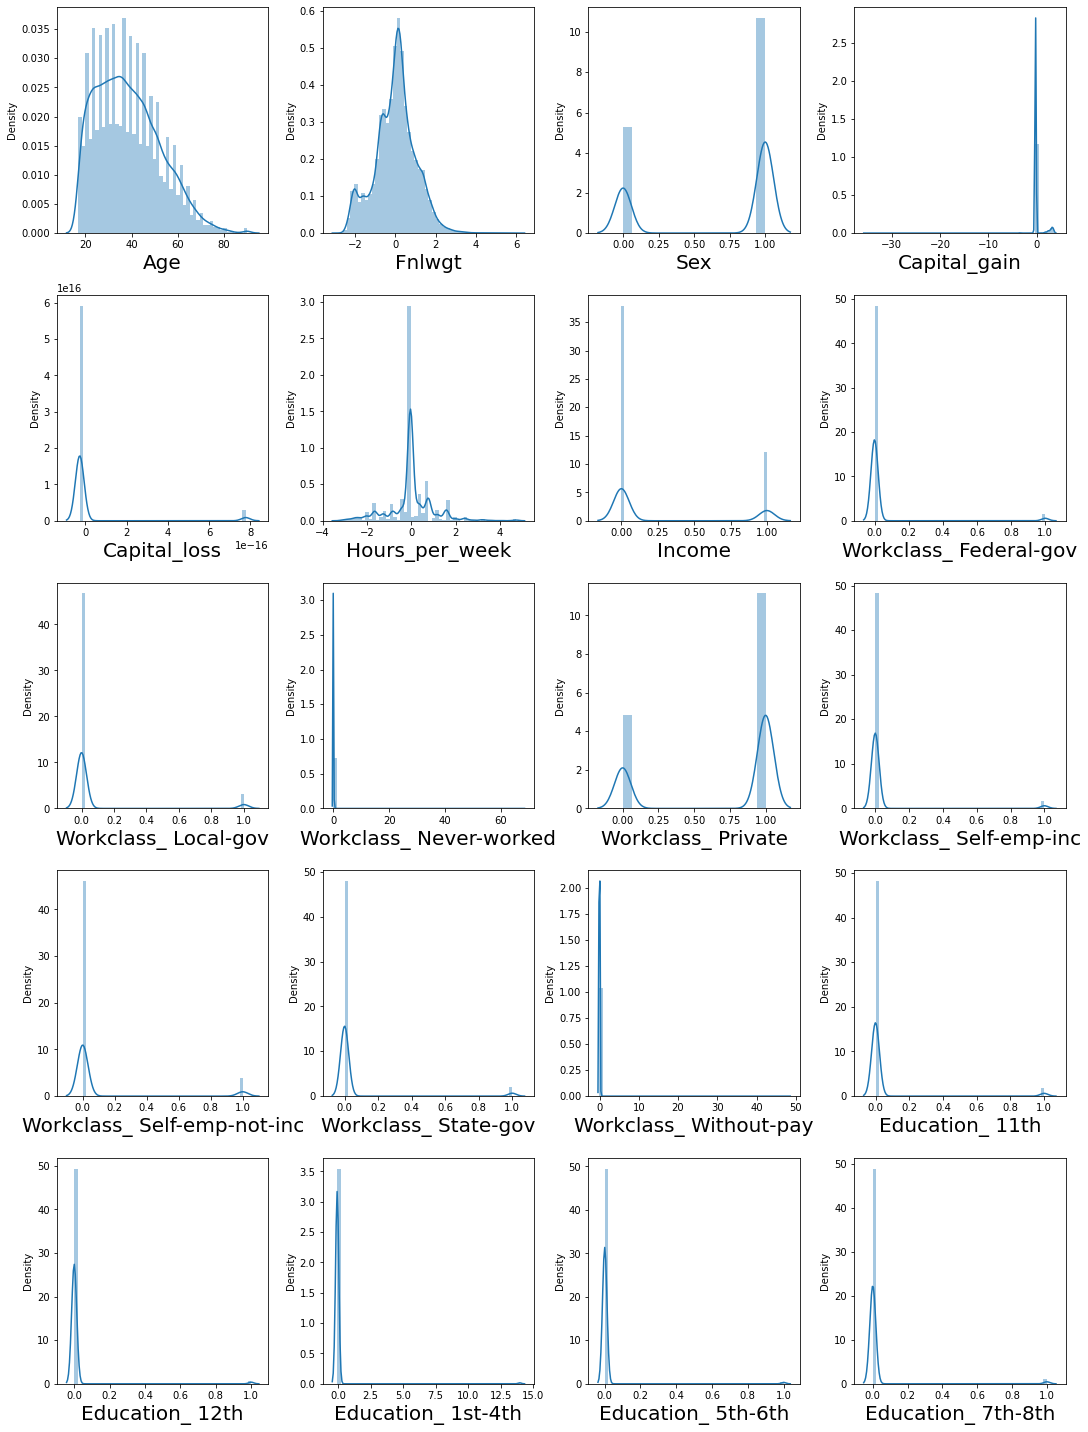

In [69]:
#Let's see the distribution after transformation/removing skewnees
plt.figure(figsize=(15,20))
plotnumber=1
for column in data:
    if plotnumber<=20:
        ax=plt.subplot(5,4,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

Now data looks good now check colinareity 

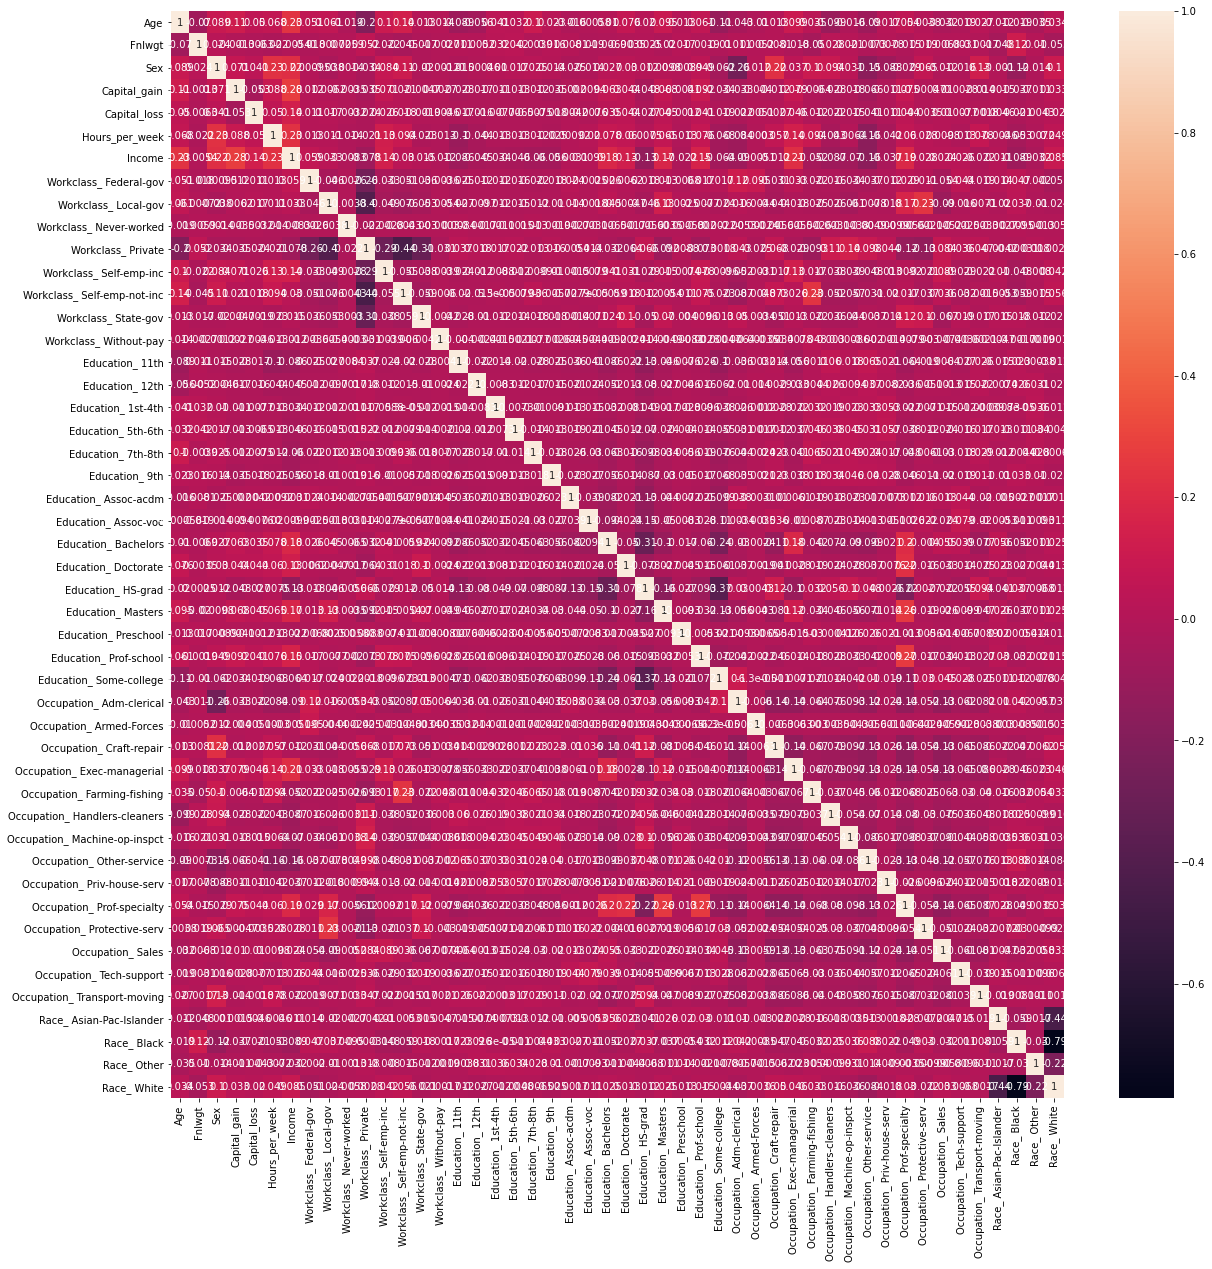

In [70]:
#check multicolinearity
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(),annot=True,annot_kws={'size':10})
plt.show()

from above graph we can see there is no multicolinarity avilabe in variables so lets move further to check the outliers by plotting the box plot.

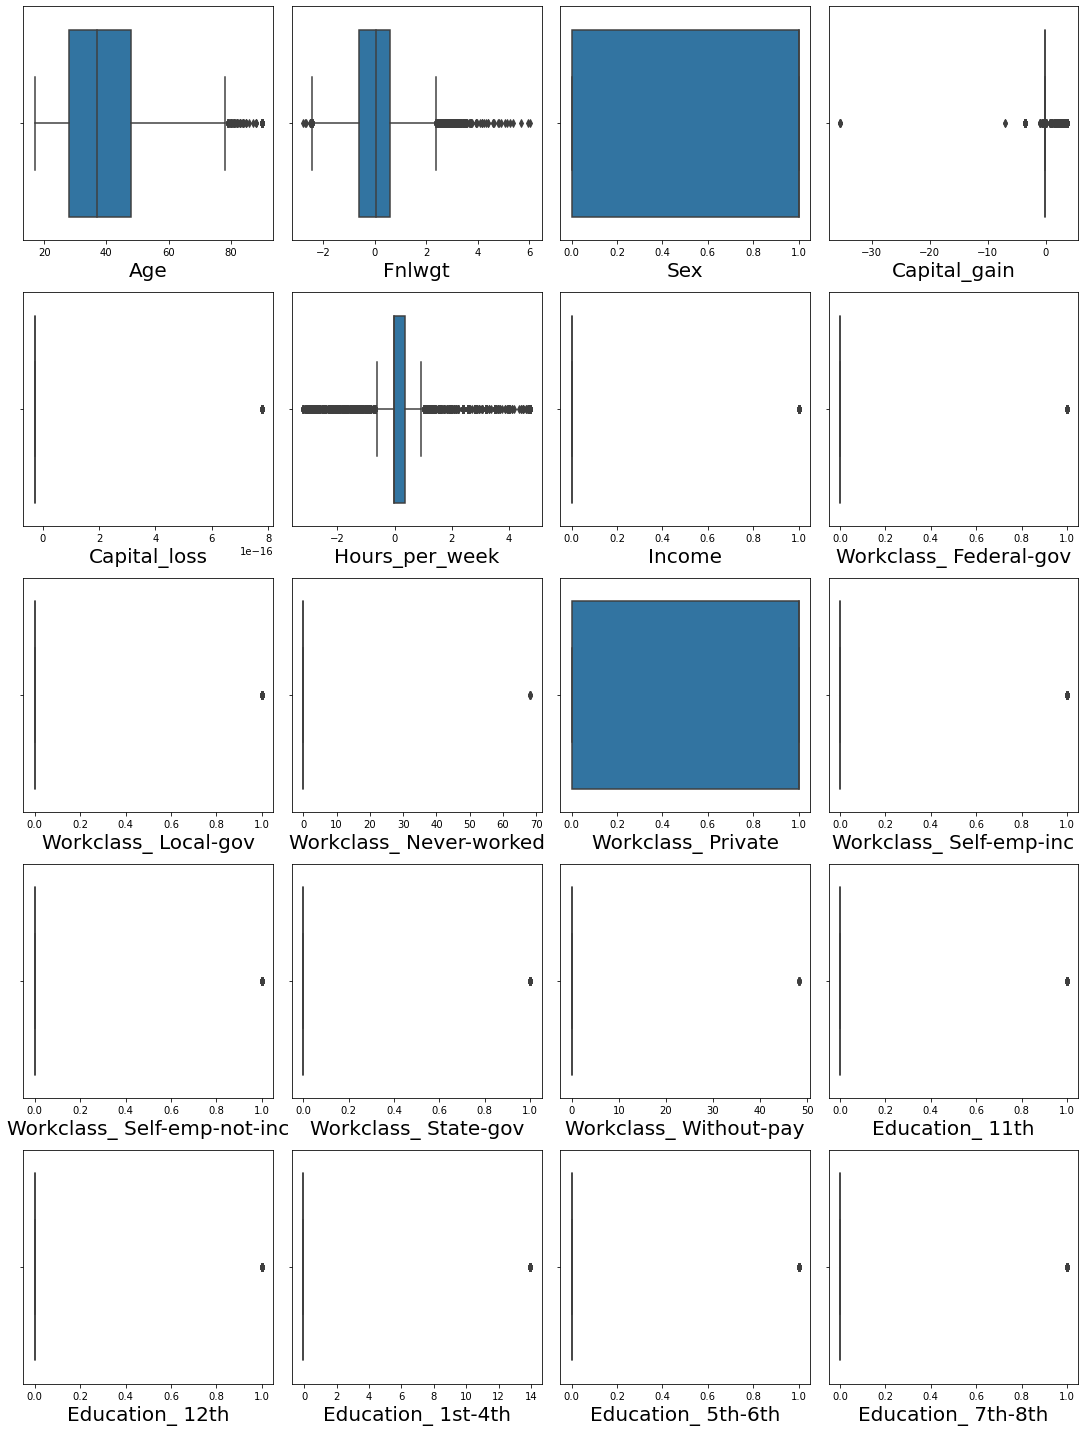

In [71]:
#Let's see the distribution for outliers
plt.figure(figsize=(15,20))
plotnumber=1
for column in data:
    if plotnumber<=20:
        ax=plt.subplot(5,4,plotnumber)
        sns.boxplot(data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [72]:
#As outliers present in features first remove it 
q1=data.quantile(0.25)
q3=data.quantile(0.75)
iqr=q3-q1

In [73]:
Age_H=(q3.Age+(1.5*iqr.Age))
Fnlwgt_H=(q3.Fnlwgt+(1.5*iqr.Fnlwgt))
Capital_gain_H=(q3.Capital_gain+(1.5*iqr.Capital_gain))
Capital_loss_H=(q3.Capital_loss+(1.5*iqr.Capital_loss))
Hours_per_week_H=(q3.Hours_per_week+(1.5*iqr.Hours_per_week))

In [74]:
Index=np.where(data['Age']>Age_H)
print(Index)
data=data.drop(data.index[Index])
data.shape

(array([   73,   221,   429,   917,  1039,  1167,  1934,  2302,  2753,
        2890,  2905,  3210,  3337,  3536,  3776,  3961,  4068,  4107,
        4718,  4832,  5268,  5287,  5366,  5402,  5996,  6169,  6210,
        6228,  6435,  6620,  6744,  7477,  7716,  7868,  8172,  8377,
        8427,  8518,  8690,  8802,  8959,  8969,  9466, 10119, 10205,
       10540, 11094, 11233, 11507, 11527, 11725, 11990, 12444, 12485,
       12823, 12968, 13018, 13019, 13287, 13688, 13920, 14095, 14150,
       14595, 14702, 14747, 14894, 15346, 15651, 15881, 16291, 16512,
       16751, 16890, 17595, 18023, 18127, 18258, 18263, 18399, 18545,
       18709, 18816, 19029, 19156, 19164, 19196, 19473, 19479, 19499,
       19673, 19731, 19812, 20233, 20405, 20447, 20466, 20467, 20594,
       20809, 20863, 20936, 21325, 21481, 21792, 21815, 22199, 22458,
       22871, 22874, 23435, 23876, 24003, 24019, 24214, 24256, 24370,
       24534, 25136, 25276, 25370, 25984, 26214, 26702, 27766, 28147,
       28431, 28688

(32375, 48)

In [75]:
Index=np.where(data['Fnlwgt']>Fnlwgt_H)
print(Index)
data=data.drop(data.index[Index])
data.shape

(array([   36,   180,   190,   213,   227,   309,   411,   504,   647,
         823,   910,   958,  1007,  1145,  1284,  1447,  1590,  1840,
        1963,  2057,  2333,  2338,  2360,  2750,  2760,  2814,  2840,
        2889,  2965,  3181,  3290,  3395,  3488,  3554,  3556,  3597,
        3704,  3723,  3729,  3732,  3853,  3889,  3946,  3965,  4258,
        4553,  4677,  4708,  4950,  5253,  5324,  5343,  5395,  5477,
        5502,  5525,  5594,  5699,  5989,  6115,  6138,  6187,  6226,
        6255,  6668,  6698,  6748,  6817,  6844,  7086,  7122,  7297,
        7316,  7420,  7468,  7627,  7683,  7896,  7998,  8198,  8219,
        8237,  8306,  8392,  8444,  8513,  8616,  8686,  8877,  8952,
        8972,  9000,  9201,  9275,  9568,  9652,  9667,  9688,  9700,
        9706,  9708,  9752,  9959, 10350, 10392, 10668, 10863, 11005,
       11275, 11283, 11408, 11639, 11779, 11827, 11920, 11970, 12002,
       12020, 12205, 12273, 12322, 12328, 12426, 12450, 12641, 12699,
       12769, 12785

(32058, 48)

In [76]:
Index=np.where(data['Capital_gain']>Capital_gain_H)
print(Index)
data=data.drop(data.index[Index])
data.shape

(array([    7,     8,    57, ..., 32035, 32045, 32057], dtype=int64),)


(29471, 48)

In [77]:
Index=np.where(data['Capital_loss']>Capital_loss_H)
print(Index)
data=data.drop(data.index[Index])
data.shape

(array([   20,    29,    48, ..., 29367, 29380, 29417], dtype=int64),)


(27968, 48)

In [78]:
Index=np.where(data['Hours_per_week']>Hours_per_week_H)
print(Index)
data=data.drop(data.index[Index])
data.shape

(array([    7,    17,    23, ..., 27941, 27942, 27946], dtype=int64),)


(25179, 48)

In [79]:
data.reset_index()
data

,Age,Fnlwgt,Sex,Capital_gain,Capital_loss,Hours_per_week,Income,Workclass_ Federal-gov,Workclass_ Local-gov,Workclass_ Never-worked,...,Occupation_ Priv-house-serv,Occupation_ Prof-specialty,Occupation_ Protective-serv,Occupation_ Sales,Occupation_ Tech-support,Occupation_ Transport-moving,Race_ Asian-Pac-Islander,Race_ Black,Race_ Other,Race_ White
0,50,-1.089934,1,-0.241394,-2.775558e-17,-2.222121,0,0,0,-0.014674,...,-0.067389,0,0,0,0,0,0,0,0,1
1,38,0.398535,1,-0.241394,-2.775558e-17,-0.035856,0,0,0,-0.014674,...,-0.067389,0,0,0,0,0,0,0,0,1
2,53,0.562303,1,-0.241394,-2.775558e-17,-0.035856,0,0,0,-0.014674,...,-0.067389,0,0,0,0,0,0,1,0,0
3,28,1.339997,0,-0.241394,-2.775558e-17,-0.035856,0,0,0,-0.014674,...,-0.067389,1,0,0,0,0,0,1,0,0
4,37,0.956867,0,-0.241394,-2.775558e-17,-0.035856,0,0,0,-0.014674,...,-0.067389,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32554,22,1.143678,1,-0.241394,-2.775558e-17,-0.035856,0,0,0,-0.014674,...,-0.067389,0,1,0,0,0,0,0,0,1
32555,27,0.746477,0,-0.241394,-2.775558e-17,-0.197818,0,0,0,-0.014674,...,-0.067389,0,0,0,1,0,0,0,0,1
32556,40,-0.193417,1,-0.241394,-2.775558e-17,-0.035856,1,0,0,-0.014674,...,-0.067389,0,0,0,0,0,0,0,0,1
32557,58,-0.219871,0,-0.241394,-2.775558e-17,-0.035856,0,0,0,-0.014674,...,-0.067389,0,0,0,0,0,0,0,0,1


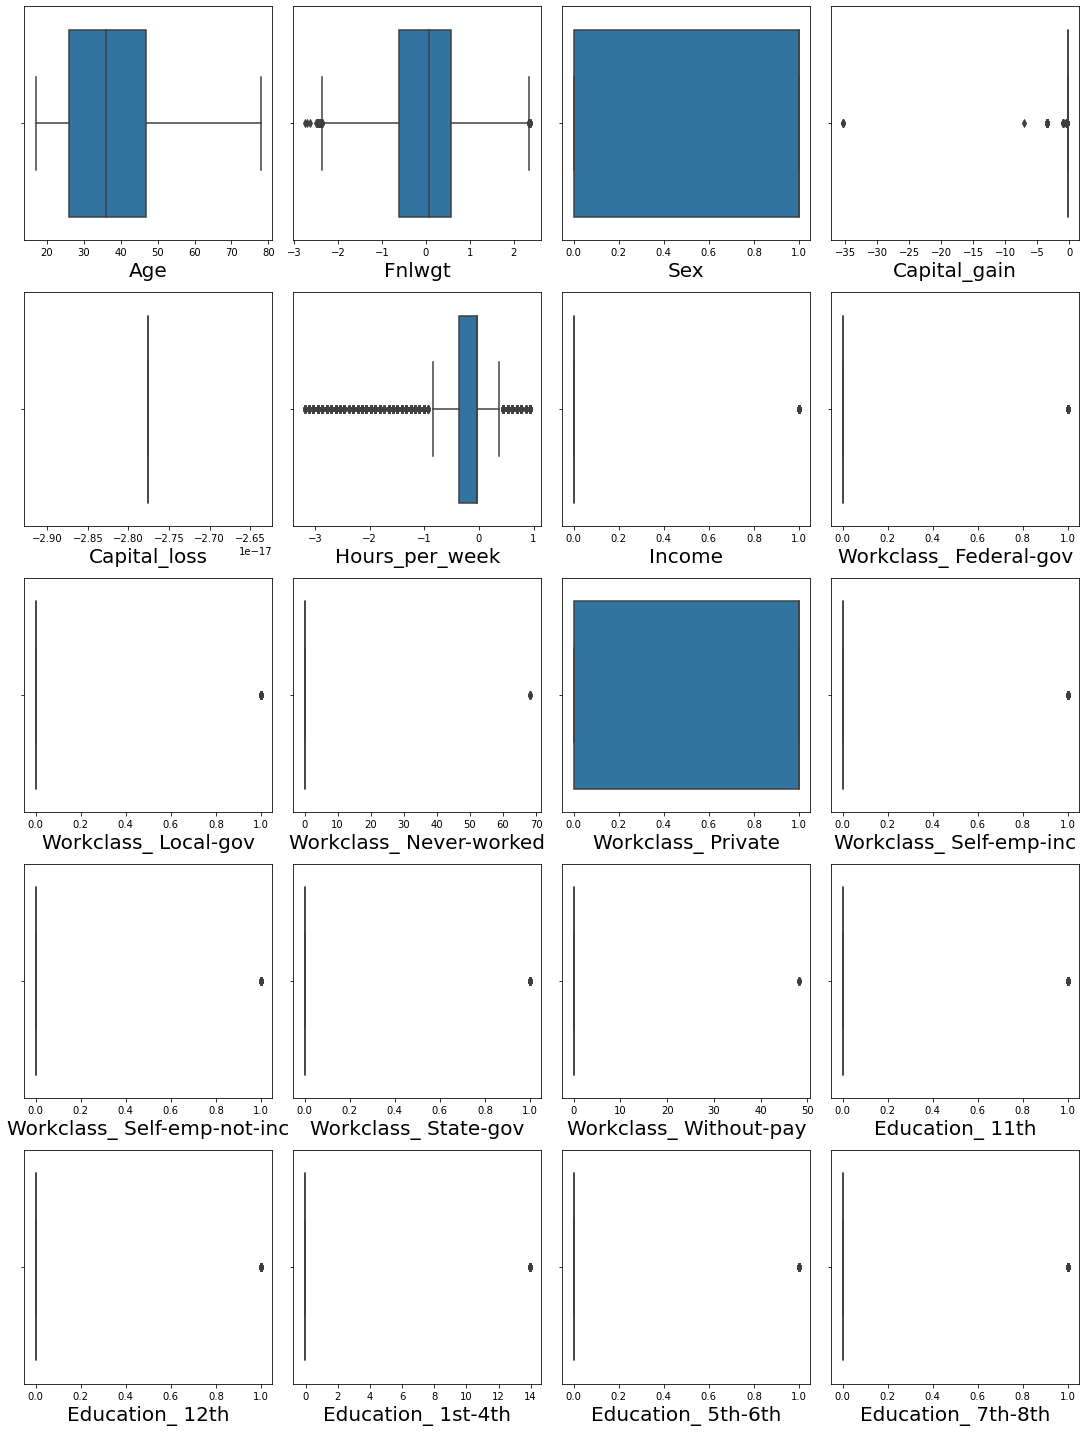

In [80]:
#Let's see the distribution after removing outliers
plt.figure(figsize=(15,20))
plotnumber=1
for column in data:
    if plotnumber<=20:
        ax=plt.subplot(5,4,plotnumber)
        sns.boxplot(data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

NOw data looks great after removeing outliers 

In [81]:
# Let's Seperate the data 
x=data.drop(columns=['Income'])
y=data['Income']

In [82]:
print(data['Income'].value_counts())

0    20797
1     4382
Name: Income, dtype: int64


We see a data imbalance in target. So lets use SMOTE.

In [83]:
# data stadardization
scale=StandardScaler()
x_scaled=scale.fit_transform(x)

In [89]:
# Selecting perfect random state for better accuracy
from sklearn.linear_model import LogisticRegression

LR= LogisticRegression()
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.30,random_state=i)
    LR.fit(x_train,y_train)
    y_pred=LR.predict(x_train)
    pred=LR.predict(x_test)
    print(f"at random sate {i}, the training accuracy is:- {accuracy_score(y_train,y_pred)}")
    print(f"at random sate {i}, the testing accuracy is:- {accuracy_score(y_test,pred)}")
    print("\n")

at random sate 0, the training accuracy is:- 0.8502695035460993
at random sate 0, the testing accuracy is:- 0.853984643897273


at random sate 1, the training accuracy is:- 0.8531631205673759
at random sate 1, the testing accuracy is:- 0.8435266084193804


at random sate 2, the training accuracy is:- 0.851063829787234
at random sate 2, the testing accuracy is:- 0.8480275350807519


at random sate 3, the training accuracy is:- 0.8499290780141844
at random sate 3, the testing accuracy is:- 0.852660841938046


at random sate 4, the training accuracy is:- 0.8506099290780141
at random sate 4, the testing accuracy is:- 0.8489541964522107


at random sate 5, the training accuracy is:- 0.8523687943262411
at random sate 5, the testing accuracy is:- 0.8456446915541435


at random sate 6, the training accuracy is:- 0.8486808510638297
at random sate 6, the testing accuracy is:- 0.8533227429176595


at random sate 7, the training accuracy is:- 0.8470354609929078
at random sate 7, the testing accura

at random sate 64, the training accuracy is:- 0.851177304964539
at random sate 64, the testing accuracy is:- 0.8480275350807519


at random sate 65, the training accuracy is:- 0.8509503546099291
at random sate 65, the testing accuracy is:- 0.8512046597828965


at random sate 66, the training accuracy is:- 0.8512340425531915
at random sate 66, the testing accuracy is:- 0.8482922954725973


at random sate 67, the training accuracy is:- 0.8500992907801418
at random sate 67, the testing accuracy is:- 0.8513370399788192


at random sate 68, the training accuracy is:- 0.8507801418439717
at random sate 68, the testing accuracy is:- 0.8471008737092931


at random sate 69, the training accuracy is:- 0.8504397163120567
at random sate 69, the testing accuracy is:- 0.8513370399788192


at random sate 70, the training accuracy is:- 0.851290780141844
at random sate 70, the testing accuracy is:- 0.8481599152766746


at random sate 71, the training accuracy is:- 0.8507234042553191
at random sate 71, t

 At 62 and 83 of random state the accurcay almost same so i am selecting 83 random sate

In [90]:
# Again Split data into train & test by using this new random state
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.30,random_state=83)

In [91]:
# Lets use of Resampling Techniques to handle Imbalanced Data 
from imblearn.over_sampling import SMOTE
from collections import Counter

ove_smp=SMOTE(0.90)
x_train_ns,y_train_ns=ove_smp.fit_sample(x_train,y_train)
print(Counter(y_train))
print(Counter(y_train_ns))

Counter({0: 14546, 1: 3079})
Counter({0: 14546, 1: 13091})


# Build Model to predict Income

In [92]:
def print_score(model,x_train_ns,x_test,y_train_ns,y_test,train=True):
    if train:
        y_pred=model.predict(x_train_ns)
        print("Train Report:",accuracy_score(y_train_ns,y_pred))
    elif train==False:
        pred=model.predict(x_test)
        print("Test Report:",accuracy_score(y_test,pred))
        print("Classification Report:",classification_report(y_test,pred))
        print("Confusion Matrix:",confusion_matrix(y_test,pred))

In [93]:
#Below is a function to find the accuracy of each model on the basis of K-fold cross validation.
from sklearn.model_selection import cross_val_score

def model_accuracy(model,X_train=x_train_ns,y_train=y_train_ns):
    accuracies = cross_val_score(estimator = model, X = X_train, y = y_train, cv =2)
    print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
    print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

In [94]:
# Model no.1
from sklearn.ensemble import RandomForestClassifier

rand_clf= RandomForestClassifier()
rand_clf.fit(x_train_ns,y_train_ns)

print_score(rand_clf,x_train_ns,x_test,y_train_ns,y_test,train=True)
print_score(rand_clf,x_train_ns,x_test,y_train_ns,y_test,train=False)
model_accuracy(rand_clf)

Train Report: 0.9999276332452871
Test Report: 0.8116229812020122
Classification Report:               precision    recall  f1-score   support

           0       0.89      0.88      0.89      6251
           1       0.46      0.47      0.46      1303

    accuracy                           0.81      7554
   macro avg       0.67      0.68      0.67      7554
weighted avg       0.81      0.81      0.81      7554

Confusion Matrix: [[5519  732]
 [ 691  612]]
Accuracy: 86.35 %
Standard Deviation: 2.11 %


In [95]:
#Model no.2
from sklearn.tree import DecisionTreeClassifier

dt=DecisionTreeClassifier()

dt.fit(x_train_ns,y_train_ns)

print_score(dt,x_train_ns,x_test,y_train_ns,y_test,train=True)
print_score(dt,x_train_ns,x_test,y_train_ns,y_test,train=False)
model_accuracy(dt)

Train Report: 0.9999276332452871
Test Report: 0.7754831877151178
Classification Report:               precision    recall  f1-score   support

           0       0.88      0.85      0.86      6251
           1       0.37      0.44      0.40      1303

    accuracy                           0.78      7554
   macro avg       0.63      0.64      0.63      7554
weighted avg       0.79      0.78      0.78      7554

Confusion Matrix: [[5288  963]
 [ 733  570]]
Accuracy: 81.50 %
Standard Deviation: 1.91 %


In [96]:
#Model no.3
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier()

knn.fit(x_train_ns,y_train_ns)

print_score(knn,x_train_ns,x_test,y_train_ns,y_test,train=True)
print_score(knn,x_train_ns,x_test,y_train_ns,y_test,train=False)
model_accuracy(knn)

Train Report: 0.8847197597423744
Test Report: 0.7468890653958168
Classification Report:               precision    recall  f1-score   support

           0       0.91      0.77      0.83      6251
           1       0.37      0.64      0.47      1303

    accuracy                           0.75      7554
   macro avg       0.64      0.71      0.65      7554
weighted avg       0.82      0.75      0.77      7554

Confusion Matrix: [[4804 1447]
 [ 465  838]]
Accuracy: 80.18 %
Standard Deviation: 0.83 %


In [129]:
#Model no.4
from sklearn.ensemble import GradientBoostingClassifier

gbdt=GradientBoostingClassifier()

gbdt.fit(x_train_ns,y_train_ns)

print_score(gbdt,x_train_ns,x_test,y_train_ns,y_test,train=True)
print_score(gbdt,x_train_ns,x_test,y_train_ns,y_test,train=False)
model_accuracy(gbdt)

Train Report: 0.829648659405869
Test Report: 0.7863383637807784
Classification Report:               precision    recall  f1-score   support

           0       0.92      0.81      0.86      6251
           1       0.43      0.68      0.52      1303

    accuracy                           0.79      7554
   macro avg       0.68      0.75      0.69      7554
weighted avg       0.84      0.79      0.80      7554

Confusion Matrix: [[5050 1201]
 [ 413  890]]
Accuracy: 81.52 %
Standard Deviation: 1.38 %


In [98]:
#Model no.5
from sklearn.ensemble import BaggingClassifier

bb=BaggingClassifier()

bb.fit(x_train_ns,y_train_ns)

print_score(bb,x_train_ns,x_test,y_train_ns,y_test,train=True)
print_score(bb,x_train_ns,x_test,y_train_ns,y_test,train=False)
model_accuracy(bb)

Train Report: 0.9920396569815827
Test Report: 0.8141382049245433
Classification Report:               precision    recall  f1-score   support

           0       0.88      0.89      0.89      6251
           1       0.46      0.43      0.44      1303

    accuracy                           0.81      7554
   macro avg       0.67      0.66      0.67      7554
weighted avg       0.81      0.81      0.81      7554

Confusion Matrix: [[5588  663]
 [ 741  562]]
Accuracy: 84.45 %
Standard Deviation: 2.85 %


In [99]:
#Model no.6
import xgboost as xgb

xgb=xgb.XGBClassifier()

xgb.fit(x_train_ns,y_train_ns)

print_score(xgb,x_train_ns,x_test,y_train_ns,y_test,train=True)
print_score(xgb,x_train_ns,x_test,y_train_ns,y_test,train=False)
model_accuracy(xgb)

Train Report: 0.925824076419293
Test Report: 0.8400847233253905
Classification Report:               precision    recall  f1-score   support

           0       0.89      0.92      0.91      6251
           1       0.55      0.43      0.48      1303

    accuracy                           0.84      7554
   macro avg       0.72      0.68      0.69      7554
weighted avg       0.83      0.84      0.83      7554

Confusion Matrix: [[5781  470]
 [ 738  565]]
Accuracy: 85.07 %
Standard Deviation: 5.68 %


In [102]:
# Hyper tuning by using GridSearchCV with XGB Classifier

from sklearn.model_selection import GridSearchCV

para={'max_depth':range(0,12,2),'learning_rate':[0.25,0.1,0.3],'n_estimators':range(10,100)}
grid=GridSearchCV(estimator=xgb, param_grid=para,cv=2)
grid.fit(x_train_ns,y_train_ns)

print(grid.best_params_)

{'learning_rate': 0.25, 'max_depth': 10, 'n_estimators': 70}


In [136]:
import xgboost as xgb
xgb=xgb.XGBClassifier(learning_rate= 0.3, max_depth=10,n_estimators=60)

xgb.fit(x_train_ns,y_train_ns)

print_score(xgb,x_train_ns,x_test,y_train_ns,y_test,train=True)
print_score(xgb,x_train_ns,x_test,y_train_ns,y_test,train=False)
model_accuracy(xgb)

Train Report: 0.9522741252668524
Test Report: 0.8359809372517871
Classification Report:               precision    recall  f1-score   support

           0       0.88      0.92      0.90      6251
           1       0.53      0.41      0.46      1303

    accuracy                           0.84      7554
   macro avg       0.71      0.67      0.68      7554
weighted avg       0.82      0.84      0.83      7554

Confusion Matrix: [[5781  470]
 [ 769  534]]
Accuracy: 85.39 %
Standard Deviation: 5.58 %


In [113]:
# Hyper tuning by using RandomizedSearchCV With RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

para={'n_estimators':range(2,60,10),'max_depth':range(0,20,2),'learning_rate':[0.1,0.01,0.2,0.3]}
rand=RandomizedSearchCV(estimator=xgb,param_distributions=para,cv=2)
rand.fit(x_train_ns,y_train_ns)

rand.best_params_

{'n_estimators': 52, 'max_depth': 12, 'learning_rate': 0.1}

In [126]:
import xgboost as xgb
xgb=xgb.XGBClassifier(learning_rate= 0.15, max_depth=12,n_estimators=62)

xgb.fit(x_train_ns,y_train_ns)

print_score(xgb,x_train_ns,x_test,y_train_ns,y_test,train=True)
print_score(xgb,x_train_ns,x_test,y_train_ns,y_test,train=False)
model_accuracy(xgb)

Train Report: 0.9420704128523356
Test Report: 0.8329361927455653
Classification Report:               precision    recall  f1-score   support

           0       0.89      0.91      0.90      6251
           1       0.52      0.46      0.48      1303

    accuracy                           0.83      7554
   macro avg       0.70      0.68      0.69      7554
weighted avg       0.83      0.83      0.83      7554

Confusion Matrix: [[5698  553]
 [ 709  594]]
Accuracy: 85.45 %
Standard Deviation: 4.09 %


# lets check ROC AUC curve for fitted model

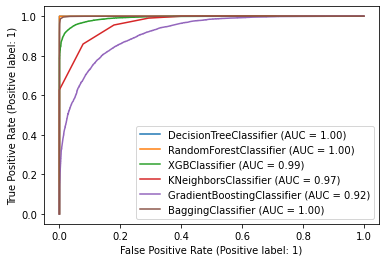

In [137]:
from sklearn.metrics import roc_curve,roc_auc_score, plot_roc_curve

disp=plot_roc_curve(dt,x_train_ns,y_train_ns)
plot_roc_curve(rand_clf,x_train_ns,y_train_ns,ax=disp.ax_)
plot_roc_curve(xgb,x_train_ns,y_train_ns,ax=disp.ax_)
plot_roc_curve(knn,x_train_ns,y_train_ns,ax=disp.ax_)
plot_roc_curve(gbdt,x_train_ns,y_train_ns,ax=disp.ax_)
plot_roc_curve(bb,x_train_ns,y_train_ns,ax=disp.ax_)

# Lets check how our model works on test data

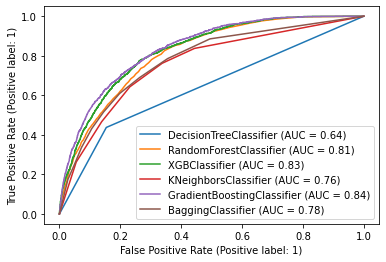

In [138]:
disp=plot_roc_curve(dt,x_test,y_test)
plot_roc_curve(rand_clf,x_test,y_test,ax=disp.ax_)
plot_roc_curve(xgb,x_test,y_test,ax=disp.ax_)
plot_roc_curve(knn,x_test,y_test,ax=disp.ax_)
plot_roc_curve(gbdt,x_test,y_test,ax=disp.ax_)
plot_roc_curve(bb,x_test,y_test,ax=disp.ax_)

# Looking at accuracy, roc_auc plot & confusion matrix i m selecting XGBClassifier with RandomizedSearchCV hypertune parameter by using Kfold cross validation method¶


In [140]:
#save model
import pickle
Filename='Finalized_model_income.pickle'
pickle.dump(rand_clf,open(Filename,'wb'))